In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go

In [2]:
df = pd.read_excel('analisis compañias.xlsx', header=[0])
df

,Compañía,tecnologia,Phase,Targets,Pais
0,Acadia,ASO,Pre-Clinical,Neurodegenerative,USA
1,Entrada Therapeutics,ASO,Pre-Clinical,Muscular diseases,USA
2,NeuBased,ASO,Pre-Clinical,Orphan diseases,USA
3,Pyc Therapheutics,ASO,Pre-Clinical,Ophtalmology,Australia
4,Aro Biotherapeutics,ASO,Pre-Clinical,Muscular diseases,USA
...,...,...,...,...,...
155,HDT Bio,mRNA,Phase II,Immunology,USA
156,Enzerna Biosciences,RNA editing,Pre-Clinical,Muscular diseases,USA
157,Resalis Therapeutics,ASO,Pre-Clinical,Metabolic,Italy
158,Contera Pharma,iRNA,Pre-Clinical,Neurodegenerative,Denmark


In [3]:
tecnologia= df['tecnologia'].value_counts()
fase = df['Phase'].value_counts()
area = df['Targets'].value_counts()
pais = df['Pais'].value_counts()

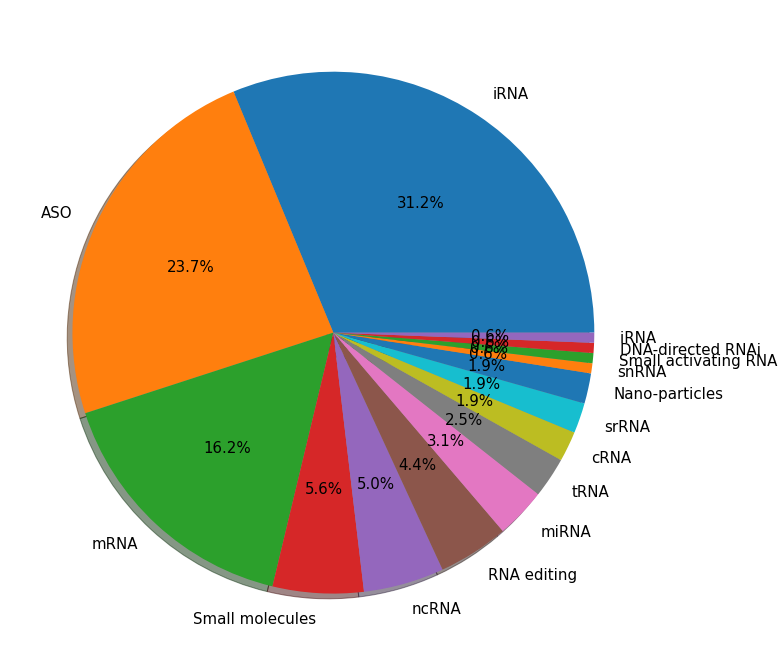

In [4]:
#gráfico por tecnologia
fig1, ax1 = plt.subplots(figsize=(12,12))
ax1.pie(tecnologia, labels = tecnologia.index, autopct='%1.1f%%',
        shadow=True, startangle=00,textprops={'fontsize': 15})

plt.rcParams.update({'text.color': "black",
                     'axes.labelcolor': "black"})

#plt.legend()
plt.show() 

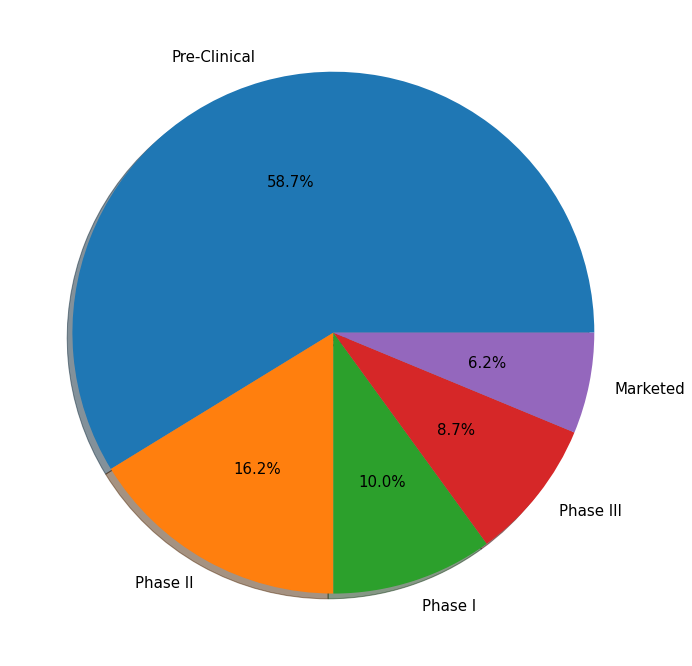

In [5]:
#gráfico por fase 
fig1, ax1 = plt.subplots(figsize=(12,12))
ax1.pie(fase, labels = fase.index, autopct='%1.1f%%',
        shadow=True, startangle=00,textprops={'fontsize': 15})

plt.rcParams.update({'text.color': "black",
                     'axes.labelcolor': "black"})

#plt.legend()
plt.show() 

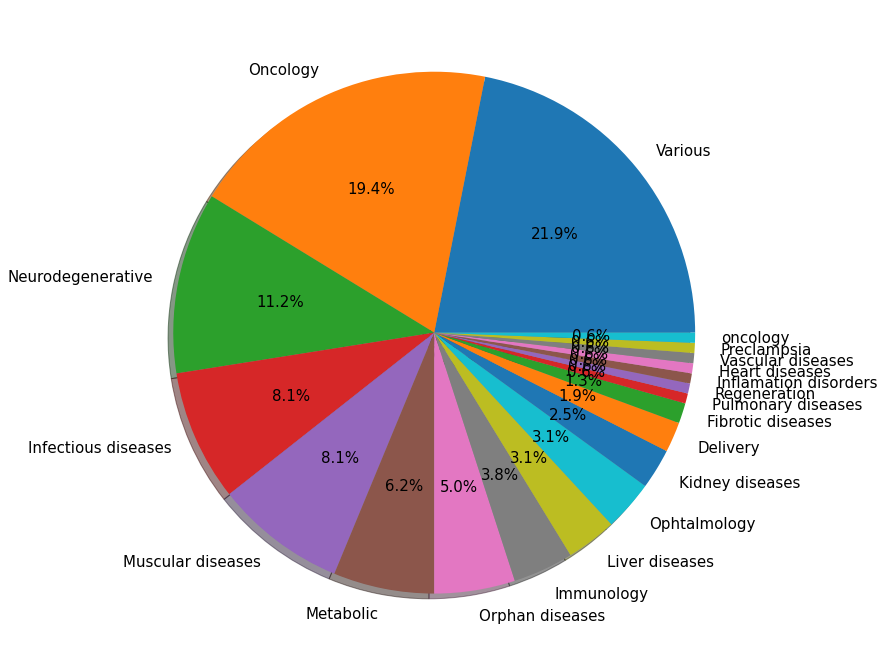

In [6]:
#gráfico por area terapeutica
fig1, ax1 = plt.subplots(figsize=(12,12))
ax1.pie(area, labels = area.index, autopct='%1.1f%%',
        shadow=True, startangle=00,textprops={'fontsize': 15})

plt.rcParams.update({'text.color': "black",
                     'axes.labelcolor': "black"})

#plt.legend()
plt.show() 

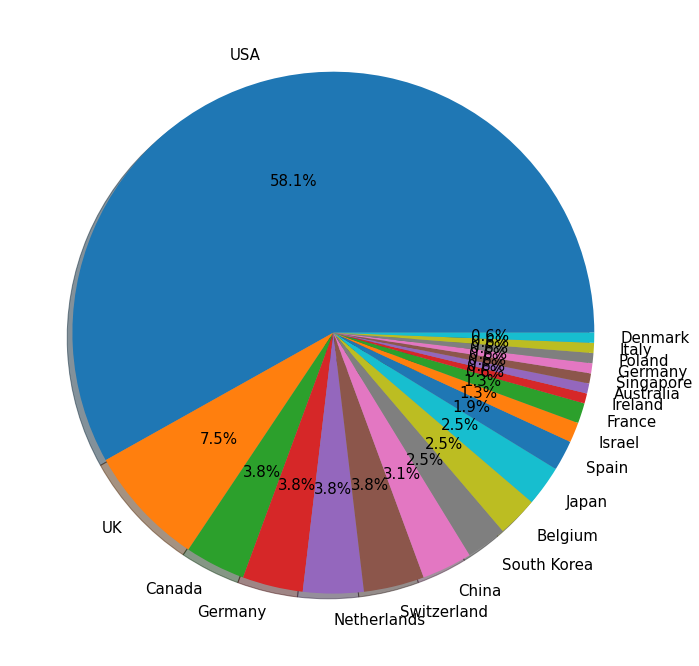

In [7]:
#gráfico por Pais
fig1, ax1 = plt.subplots(figsize=(12,12))
ax1.pie(pais, labels = pais.index, autopct='%1.1f%%',
        shadow=True, startangle=00,textprops={'fontsize': 15})

plt.rcParams.update({'text.color': "black",
                     'axes.labelcolor': "black"})

#plt.legend()
plt.show() 

In [8]:
#gráfico por Pais
fig = px.pie(values= pais, names = pais.index)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [9]:
#gráfico por tipo de tecnologia
fig = px.pie(values= tecnologia, names = tecnologia.index)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [10]:
#gráfico por fase 
fig = px.pie(values= fase, names = fase.index)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [11]:
#gráfico por area terapeutica
fig = px.pie(values= area, names = area.index)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [12]:
#data cleaning para graficos combinados
df2=df.groupby(['Targets','tecnologia']).size()
df2=pd.DataFrame(df2)#, columns=['Targets', 'tecnologia', 'valores'])
df2.rename(columns = {0: 'valores'}, inplace = True)
df3=df2.reset_index()


In [13]:
df4=df.groupby(['Targets','Phase']).size()
df4=pd.DataFrame(df4)#, columns=['Targets', 'tecnologia', 'valores'])
df4.rename(columns = {0: 'valores'}, inplace = True)
df5=df4.reset_index()


,Targets,Phase,valores
0,Delivery,Marketed,2
1,Delivery,Phase I,1
2,Fibrotic diseases,Phase III,1
3,Fibrotic diseases,Pre-Clinical,1
4,Heart diseases,Phase II,1
5,Immunology,Phase II,3
6,Immunology,Pre-Clinical,3
7,Infectious diseases,Phase I,4
8,Infectious diseases,Phase II,5
9,Infectious diseases,Phase III,1


In [14]:
#gráfico combinado 1
labels = area.index.tolist()
outer_values = df2['valores'].tolist()
inner_values = area.values.tolist()

common_props = dict(labels=labels,
                    values=outer_values,)

trace1 = go.Pie(
    hole=0.5,
    sort=False,
    direction='clockwise',
    domain={'x': [0.15, 0.85], 'y': [0.15, 0.85]},
    values=inner_values,
    labels= tecnologia.index.tolist(),
    textinfo='label',
    textposition='inside',
    marker={'line': {'color': 'white', 'width': 1}}
)

trace2 = go.Pie(
    hole=0.7,
    sort=False,
    direction='clockwise',
    values=outer_values,
    labels=labels,
    textinfo='label',
    textposition='outside',
    marker={'colors': ['green', 'red', 'blue'],
            'line': {'color': 'white', 'width': 1}}
)

fig = go.FigureWidget(data=[trace1, trace2])
fig

FigureWidget({
    'data': [{'direction': 'clockwise',
              'domain': {'x': [0.15, 0.85], 'y': [0.15,…

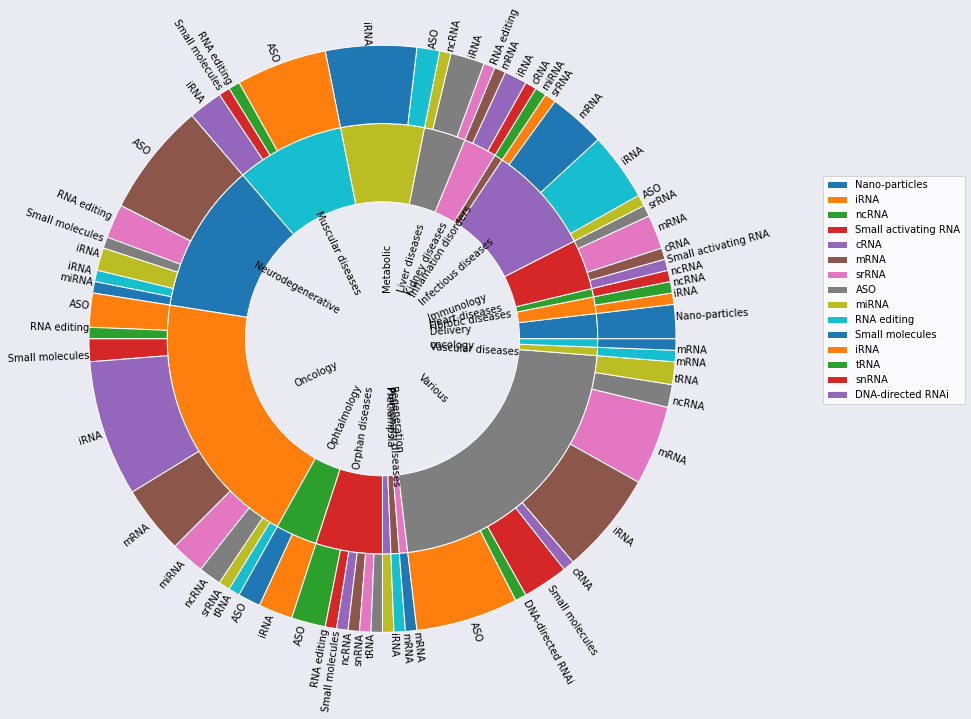

In [15]:
#gráfico combinado 2
facecolor = '#eaeaf2'
font_color = '#525252'
hfont = {'fontname':'Calibri'}
size = 0.4
vals = df2['valores']
# Major category values = sum of minor category values
group_sum = df3.groupby('Targets')['valores'].sum()
labels = group_sum.index.tolist()

fig, ax = plt.subplots(figsize=(15,9), facecolor=facecolor)

ax.pie(group_sum, 
       radius=1.5-size, 
       #colors=outer_colors, 
       labels=labels,
       labeldistance=0.22,
       rotatelabels = 270, 
       wedgeprops=dict(width=size, edgecolor='w'))


ax.pie(vals, 
       radius=1.5, # size=0.4
       #colors=inner_colors,
       labels= df3.iloc[:,1],
       labeldistance=1, 
       rotatelabels = 270,
       wedgeprops=dict(width=size, edgecolor='w'))


plt.legend(df3.iloc[:,1].unique(), loc='right', bbox_to_anchor=(1.2,0.35,0.5,0.5))
plt.show()

In [16]:
#gráfico combinado 3
labels = labels
outer_values = vals
inner_values = group_sum

common_props = dict(labels=labels,
                    values=outer_values,)

trace1 = go.Pie(
    hole=0.5,
    sort=False,
    direction='clockwise',
    domain={'x': [0.15, 0.85], 'y': [0.15, 0.85]},
    values=inner_values,
    labels= labels,
    textinfo='label',
    textposition='inside',
    marker={'line': {'color': 'white', 'width': 1}}
)

trace2 = go.Pie(
    hole=0.7,
    sort=False,
    direction='clockwise',
    values=outer_values,
    labels=df3.iloc[:,1],
    textinfo='label',
    textposition='outside',
    marker={'colors': ['green', 'red', 'blue'],
            'line': {'color': 'white', 'width': 1}}
)

fig = go.FigureWidget(data=[trace1, trace2])
fig.update_layout(margin=dict(t=1, b=1, l=1, r=1))
fig

#Los valores son agrupados automaticamente, este aproach no sirve

FigureWidget({
    'data': [{'direction': 'clockwise',
              'domain': {'x': [0.15, 0.85], 'y': [0.15,…

In [17]:
#gráfico combinado 4
fig = px.sunburst(df3, path=['Targets', 'tecnologia'], values='valores',
                  #color='lifeExp',
                  #hover_data=['iso_alpha'],
                  color_continuous_scale='RdBu',
                  #color_continuous_midpoint=np.average(df['lifeExp'], weights=df['pop']))
)
fig.update_layout(margin=dict(t=1, b=1, l=1, r=1))
fig.show()

In [18]:
#gráfico combinado 6
fig = px.sunburst(df5, path=['Targets', 'Phase'], values='valores',
                  #color='lifeExp',
                  #hover_data=['iso_alpha'],
                  color_continuous_scale='RdBu',
                  #color_continuous_midpoint=np.average(df['lifeExp'], weights=df['pop']))
)
fig.update_layout(margin=dict(t=1, b=1, l=1, r=1))
fig.show()

In [24]:
df6=df.groupby(['tecnologia','Phase']).size()
df6=pd.DataFrame(df6)#, columns=['Targets', 'tecnologia', 'valores'])
df6.rename(columns = {0: 'valores'}, inplace = True)
df7=df6.reset_index()

In [25]:
#gráfico combinado 6
fig = px.sunburst(df7, path=['tecnologia', 'Phase'], values='valores',
                  #color='lifeExp',
                  #hover_data=['iso_alpha'],
                  color_continuous_scale='RdBu',
                  #color_continuous_midpoint=np.average(df['lifeExp'], weights=df['pop']))
)
fig.update_layout(margin=dict(t=1, b=1, l=1, r=1))
fig.show()